### LinearRegression:

 we make use of the California House data. We wish to predict the median value of the house based of some features.

 * Lab 2 covers the loding the dataset and the preprocessing steps. 
 * We will repeat all the preprocessing steps for your review and to make sure you done all the important steps for building the training data sets.

---
#### The California Housing Dataset   
We explore the california housing dataset, which contains US census data concerning houses in various areas around the city of California.

--
### Objective:
 Estimate the house value in california based on the features of the locality provided to you
 
 * Since the house price is a continuous variable, a regression model needs to be used to predict our continuous target variable based on a set of features.

 - In this regard, we will use the Linear regression model to predict the house price in California.

---

In [3]:
import seaborn as sns 
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

1. Loading the data:

The California housing dataset can be accessed from the sklearn.datasets module using the fetch_california_housing method.

In [4]:
cali = fetch_california_housing()

2. Data Information:

In any dataset, we should understand the meaning of each attribute in the dataset.

In [5]:
print(cali['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

3. Load the data into a Pandas DataFrame df.

In [6]:
# Load the data
df = pd.DataFrame(data=cali['data'], columns=cali['feature_names'])
df['MedHouseVal'] = cali['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


4. Determain your target dataset:

In [7]:
cali['data'].shape

(20640, 8)

In [8]:
cali.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [9]:
cali['target_names']

['MedHouseVal']

In [10]:
cali['target'].shape

(20640,)

Observations:

Based on the data information, the price of the house is indicated by the variable MedHouseVal. So, the MedHouseVal could be used as the target variable and the rest as features for the regression model.

#### 5. Data preprocessing


1- Check for missing data as NaN values. 

isnull() counts the number of missing values for each feature.

There are various way to check for missing values as following (from a to e):

In [11]:
#a- Identify NaNs
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [12]:
#b-
df.isna().sum()== 0

MedInc         True
HouseAge       True
AveRooms       True
AveBedrms      True
Population     True
AveOccup       True
Latitude       True
Longitude      True
MedHouseVal    True
dtype: bool

In [13]:
#c- 
df.isna().sum() > 0

MedInc         False
HouseAge       False
AveRooms       False
AveBedrms      False
Population     False
AveOccup       False
Latitude       False
Longitude      False
MedHouseVal    False
dtype: bool

In [14]:
#d-
df.isnull().values.any()

np.False_

In [15]:
# e-
df.isnull().any()

MedInc         False
HouseAge       False
AveRooms       False
AveBedrms      False
Population     False
AveOccup       False
Latitude       False
Longitude      False
MedHouseVal    False
dtype: bool

In [16]:
# f-
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Observations:

There are no missing values in this dataset as shown above.

f- (You can also use the info() to see if there is a null values or not)

In [17]:
# f- 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Observations

There are a total of 20640 non-null observations in each of the columns. This indicates that there are no missing values in the data.

Every column in this dataset is numeric in nature.

2- Check for duplicate rows:

* df.duplicated() prints the True/False series, marking duplicate rows.
* df.duplicated().sum() Sum the result to determine how many rows have been duplicated

In [18]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Length: 20640, dtype: bool

In [19]:
df.duplicated().sum()

np.int64(0)

Observations:

There are no dublicated rows in this dataset as shown above.

3- Checking for Multicollinearity:

correlation always a number between -1 and 1.
If the value is close to 1, it means that there is a strong positive correlation between the two variables. 
When it is close to -1, the variables have a strong negative correlation.

The relationship between two variables is generally considered strong when
their r value is larger than 0.75 or less than -0.75

you can use correlation matrix to check for Multicollinearity


<Axes: >

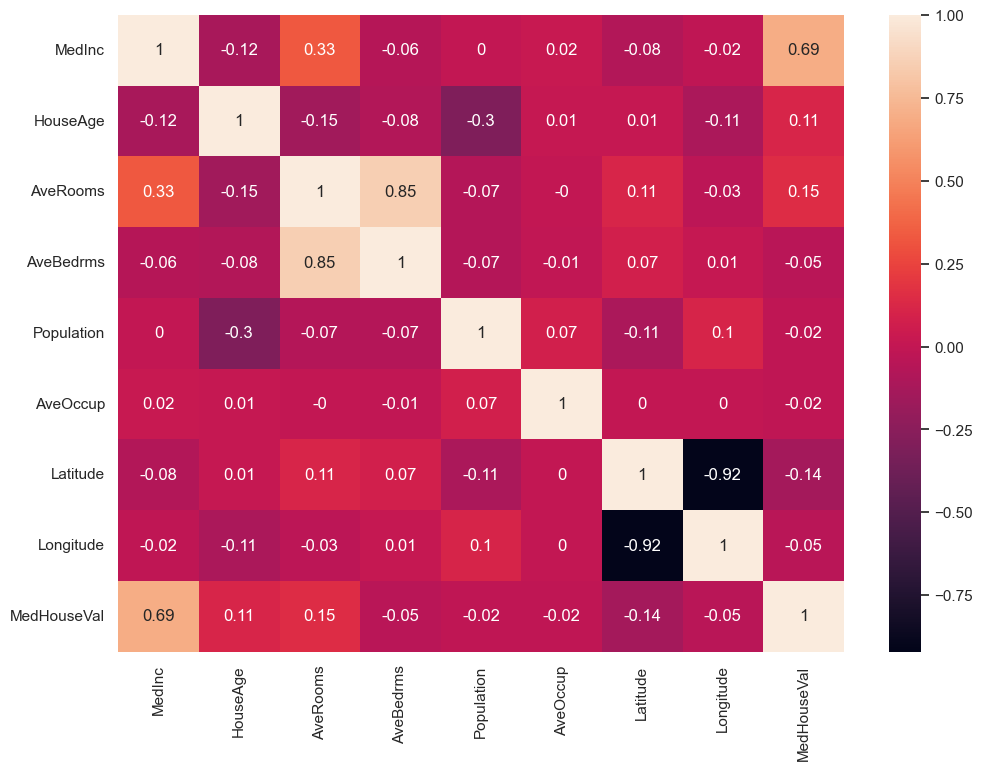

In [20]:
corr = df.corr().round(2)
#corr.style.background_gradient(cmap='coolwarm')
# or
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data=corr, annot=True)



Observations:

There is a strong correlation between the features:

Longitude - Latitude (-0.92)







##### Although dropping correlated variables can increase the performance of our models, we may lose important information about our data.
##### Therefore, we will apply  Shrinkage Methods (sometimes called subset selection methods)

4. For linear regression, we need to check the linear relationship between the target and the features

First: divide the data into features (X) and target (y)

In [21]:
X = df.loc[:, df.columns != 'MedHouseVal']
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [22]:
y = df.loc[:,'MedHouseVal']
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

Second:  use scatter plot to get a better idea of the effect of each feature on the target variable MedHouseVal

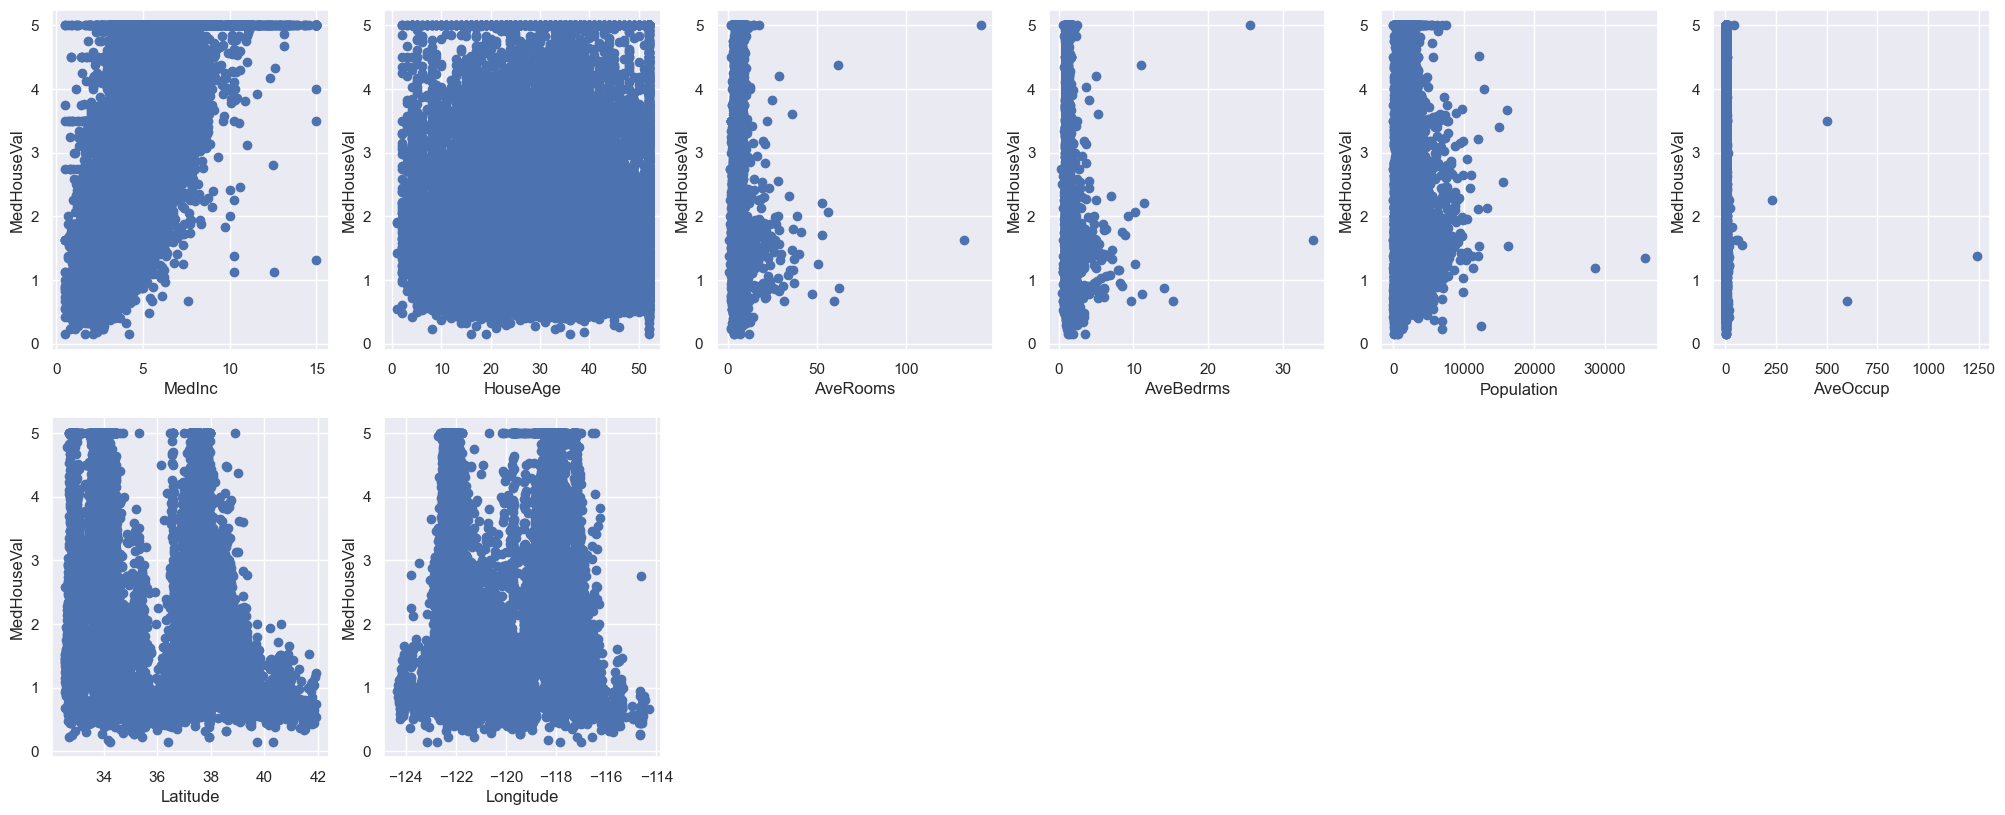

In [23]:
plt.figure(figsize = ( 25 , 15 )) 
features = list (X) 
for i, col in enumerate (features): 
    plt.subplot(3 , 6 ,i +1 ) 
    x = df[col] 
    y = y 
    plt.scatter(x, y, marker = 'o' )
    plt.xlabel(col) 
    plt.ylabel( 'MedHouseVal' )

Observations:

More importantly, it is clear that those features are not in the same scale. Hence, a very important procedure is to scale data before fitting a ML model


5. Featuer transformation:

In [24]:
df['MedInc'] = np.log(df['MedInc'])
df['HouseAge'] = np.log(df['HouseAge'])
df['AveRooms'] = np.log(df['AveRooms'])
df['AveBedrms'] = np.log(df['AveBedrms'])
df['Population'] = np.log(df['Population'])
df['AveOccup'] = np.log(df['AveOccup'])
df['Latitude'] = np.log(df['Latitude'])
df['Longitude']= np.cbrt(df['Longitude'])

<Axes: xlabel='Latitude', ylabel='MedHouseVal'>

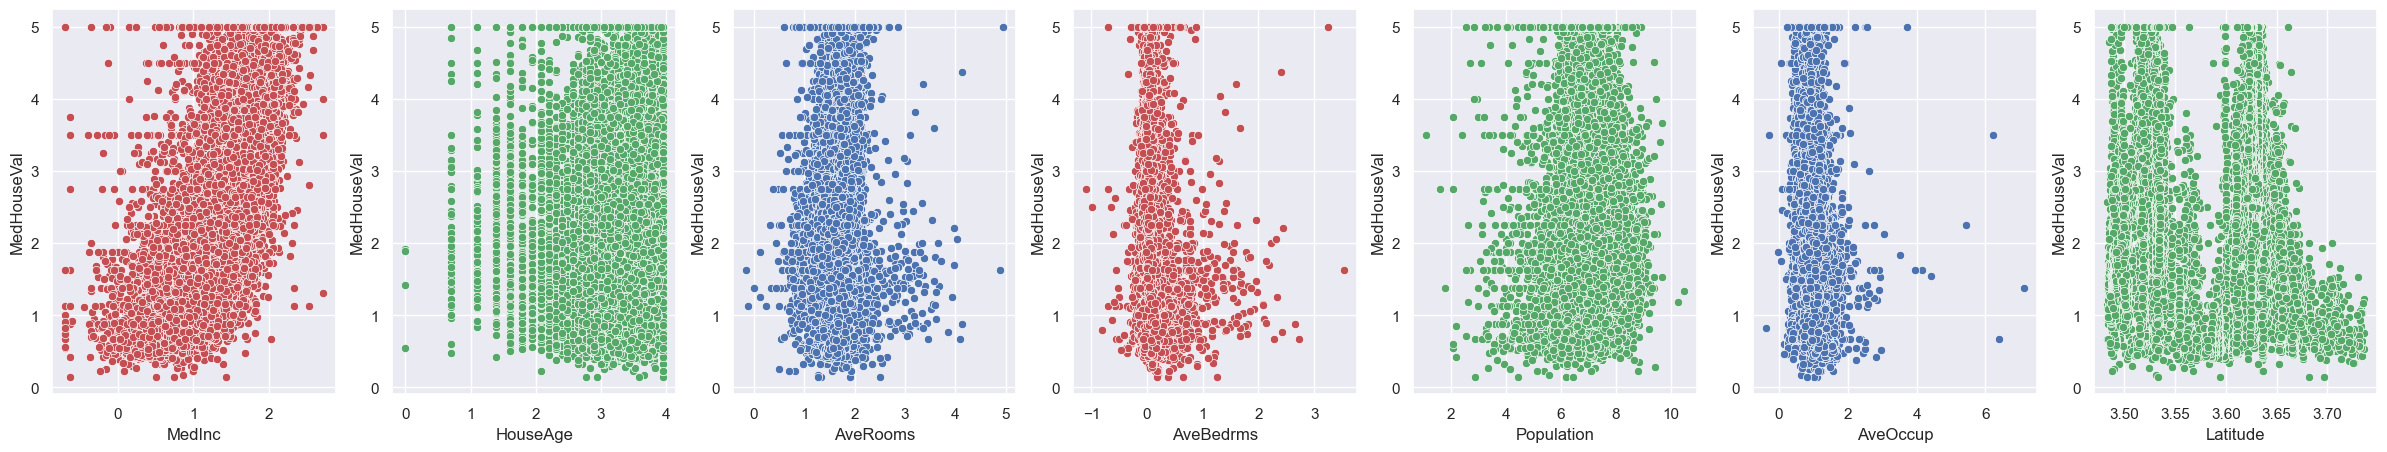

In [25]:
fig, ax =plt.subplots(1,7, figsize=(30,5))
sns.scatterplot(data=df, color='r', x='MedInc', y='MedHouseVal', ax=ax[0])
sns.scatterplot(data=df, color='g', x='HouseAge',  y='MedHouseVal', ax=ax[1])
sns.scatterplot(data=df, color='b', x='AveRooms', y='MedHouseVal', ax=ax[2])
sns.scatterplot(data=df, color='r', x='AveBedrms', y='MedHouseVal', ax=ax[3])
sns.scatterplot(data=df, color='g', x='Population',  y='MedHouseVal', ax=ax[4])
sns.scatterplot(data=df, color='b', x='AveOccup', y='MedHouseVal', ax=ax[5])
sns.scatterplot(data=df, color='g', x='Latitude',  y='MedHouseVal', ax=ax[6])
#sns.scatterplot(data=df, color='b', x='Longitude', y='MedHouseVal', ax=ax[7])

### Preparing the machine learning pipeline


1- Splitting the data into training and testing sets

We train the model with 70% of the samples and test with the remaining 30%.

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
# print the sizes of our training and test set to verify if the splitting has occurred properly.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(14448, 8)
(6192, 8)
(14448,)
(6192,)


2- Scaling Data:

Since our features have different sizes and magnitudes, this process improves the model's score on the test set.

C:\Users\Uranbileg\AppData\Local\Temp\ipykernel_5104\4145400644.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(fig.get_xticklabels(),rotation =30 )


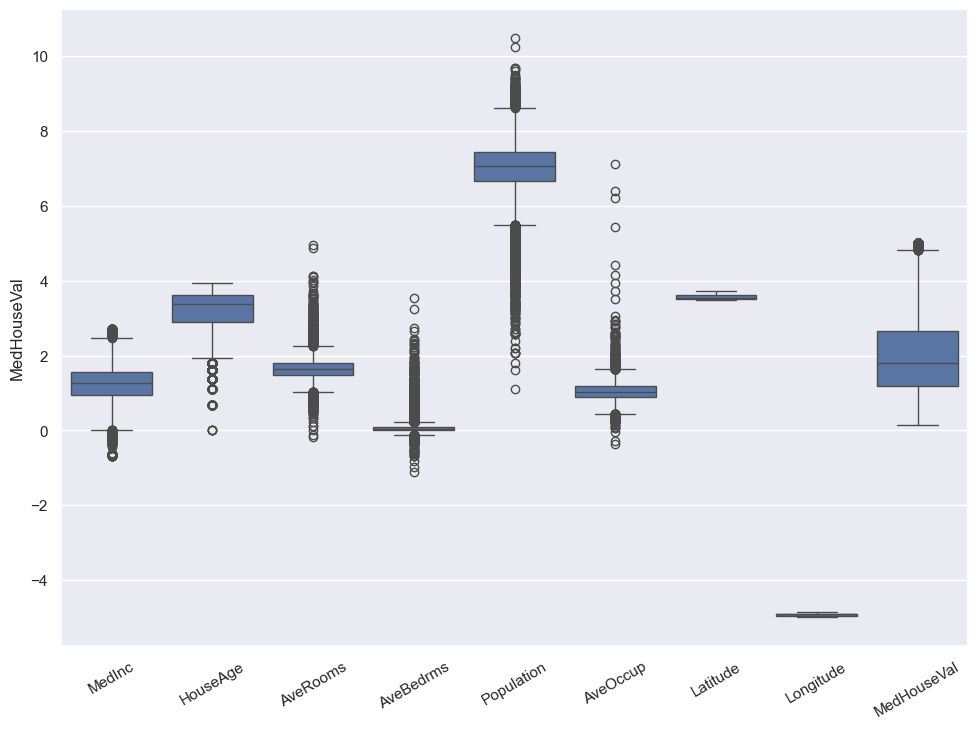

In [27]:
data_melted = pd.melt(df)
fig = sns.boxplot(x = "variable" ,y = "value" , data = data_melted) 
plt.ylabel( 'MedHouseVal' )
plt.xlabel( '' )
fig.set_xticklabels(fig.get_xticklabels(),rotation =30 )
plt.show()

In [28]:
df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.119287,3.713572,1.943640,0.023530,5.774552,0.938270,3.634423,-4.962790,4.526
1,2.116424,3.044522,1.830682,-0.028522,7.783641,0.746613,3.633895,-4.962655,3.585
2,1.982022,3.951244,2.114825,0.070874,6.206576,1.030426,3.633631,-4.962926,3.521
3,1.730434,3.951244,1.760845,0.070514,6.324359,0.935287,3.633631,-4.963061,3.413
4,1.347086,3.951244,1.837665,0.077962,6.336826,0.779998,3.633631,-4.963061,3.422
5,1.395452,3.951244,1.560596,0.098602,6.023448,0.760757,3.633631,-4.963061,2.697
6,1.297217,3.951244,1.595726,-0.049861,6.997596,0.755373,3.633367,-4.963061,2.992
7,1.137833,3.951244,1.568101,0.059988,7.053586,0.581239,3.633367,-4.963061,2.414
8,0.732560,3.737670,1.457246,0.111226,7.095064,0.706503,3.633367,-4.963196,2.267
9,1.305952,3.951244,1.603538,-0.009852,7.346655,0.775772,3.633367,-4.963061,2.611


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

3- Training the Linear rgression model:

To fit a linear regression model, scikit-learn requires a very simple recipe, which con- sists of two simple commands, shown below:

##### A- BaseLine for Linear Regression

1. Train/fit the model:

In [30]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
fit = lin_reg.fit(X_train_scaled,y_train)

2- model performance on training data and unseen data (test data)


In [31]:
y_pred_train = lin_reg.predict(X_train_scaled)
y_pred = lin_reg.predict(X_test_scaled)

3- Model evaluation

We will evaluate our model using MSE, RMSE and R2-score.



In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model_evaluation = pd.DataFrame(
    {
        "Data": ["Train", "Test"],
        "RMSE": [np.sqrt(mean_squared_error(y_pred_train, y_train)), 
                np.sqrt(mean_squared_error(y_test, y_pred))],
        "MSE": [mean_squared_error(y_pred_train, y_train),
                mean_squared_error(y_test, y_pred)],
        "R2": [r2_score(y_pred_train, y_train),
               r2_score(y_test, y_pred)],
    })

model_evaluation

,Data,RMSE,MSE,R2
0,Train,0.723435,0.523358,0.358896
1,Test,0.728401,0.530568,0.595770


Observations:

1- The RMSE is 0.723 on the training data and 0.728 on the test data. We use this value to assess how accurately the model predicts the response.

2- The R2 is 0.35 on the training data and 0.59 on the test data, which are high, but it might be given by chance

3- The MSE is  0.52 on the training data and 0.53 on the test data. 

These results show no Overfitting since the train and test scores are close to each other.

However, the  RMSE are pretty high in both train and test data, which may indicate the underfitting problem.aning the model has high bias.

4- Applying cross validation to improve the model.

In [33]:
from sklearn.model_selection import cross_val_score
cv_scores_1 = cross_val_score(lin_reg,X_train_scaled, y_train, cv=10) # R2
print("Average 10-Fold CV R2 Score: {}".format((np.mean(cv_scores_1)) ))
cv_Score_2 = cross_val_score(lin_reg, X_train_scaled, y_train, cv = 10, scoring='neg_mean_squared_error') # this return the negated value of the MSE, make sure to multiply it by -1 to get the positive one
print("Average 10-Fold CV MSE Score: {}".format(-1*(np.mean(cv_Score_2))))


Average 10-Fold CV R2 Score: 0.6073118987753819
Average 10-Fold CV MSE Score: 0.5257104326777


Observations:

1- The R-squared on the cross validation is 0.60, whereas on the training dataset it was 0.71

2- The MSE on cross validation is 0.52, whereas on the training dataset it was 0.52.

The cross-validation does not improve the model performance 

## Note:  
be careful: you should note that when we run the scikit-learn cross_val_score method, we have used the entire scaled training dataset: this means that for each different split done in cross-validation, its corre- sponding test fold was already used to find the proper scaling, which therefore violates the independence assumption that we require from the training and the test set to have unbiased estimates. In other words, we are leaking information from the test set to find the optimal scaling!

#### Solving data leaking problem :

we fit the scaling on only the training dataset, and evaluate the model performances on the validation set using cross-validation. In order to avoid this kind of problems, we use the Pipeline class, which allows to perform the splitting phase within the cross-validation by chaining these two steps.

In [34]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(StandardScaler(), LinearRegression())
scores_pipe_1 = cross_val_score(pipeline, X_train, y_train,cv=10)
print("Average 10-Fold CV R2 Score: {}".format((np.mean(scores_pipe_1)) ))
scores_pipe_2 = cross_val_score(pipeline, X_train, y_train,cv=10, scoring='neg_mean_squared_error') # this return the negated value of the MSE, make sure to multiply it by -1 to get the positive one
print("Average 10-Fold CV MSE Score: {}".format(-1*(np.mean(scores_pipe_2)) ))

Average 10-Fold CV R2 Score: 0.6073118987753819
Average 10-Fold CV MSE Score: 0.5257104326777


Observations:

1- The R-squared on the cross validation is 0.60, which is same as previous.

2- The MSE on cross-validation is 0.52, the same as the previous step. 

However, we implement the correct way even if it does not improve the result of the MSE or the R2. 
Therefore, we can say that we have an Ideal Model.